In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
import seaborn as sns

In [2]:
# Importamos los resultados en un DataFrame
df = pd.read_json("Results/resultados.json")
df

,win_rate,temperature_dda,moves_per_game,winner,opponent_name,first_player
0,1.000000,1.600000,8,agent,ChildPlayer,opponent
1,0.500000,2.100000,35,opponent,ChildPlayer,opponent
2,0.666667,2.100000,16,agent,ChildPlayer,opponent
3,0.750000,2.266667,14,agent,ChildPlayer,opponent
4,0.600000,2.516667,29,opponent,ChildPlayer,opponent
...,...,...,...,...,...,...
1195,0.525510,2.089164,28,agent,AdultSmarterPlayer,opponent
1196,0.522843,2.114674,17,opponent,AdultSmarterPlayer,opponent
1197,0.525253,2.137516,24,agent,AdultSmarterPlayer,opponent
1198,0.527638,2.162769,26,agent,AdultSmarterPlayer,opponent


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   win_rate         1200 non-null   float64
 1   temperature_dda  1200 non-null   float64
 2   moves_per_game   1200 non-null   int64  
 3   winner           1200 non-null   object 
 4   opponent_name    1200 non-null   object 
 5   first_player     1200 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 56.4+ KB


In [4]:
df.describe()

,win_rate,temperature_dda,moves_per_game
count,1200.000000,1200.000000,1200.000000
mean,0.539523,7.027893,22.236667
std,0.109200,10.269131,8.948317
min,0.000000,1.013062,7.000000
25%,0.472061,2.274026,15.000000
50%,0.510310,3.228559,22.000000
75%,0.555952,4.594790,28.000000
max,1.000000,45.136266,42.000000


In [5]:
for opponent in df['opponent_name'].unique():
    print(opponent)

ChildPlayer
ChildSmarterPlayer
TeenagerPlayer
TeenagerSmarterPlayer
AdultPlayer
AdultSmarterPlayer


# Evolución win rate y temperature

In [6]:
# Obtenemos número de partidas jugadas por cada oponente
num_games = int(df.shape[0]/df['opponent_name'].nunique())
num_games

200

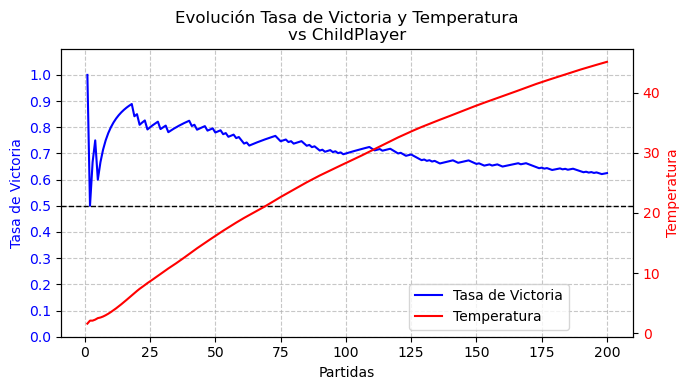

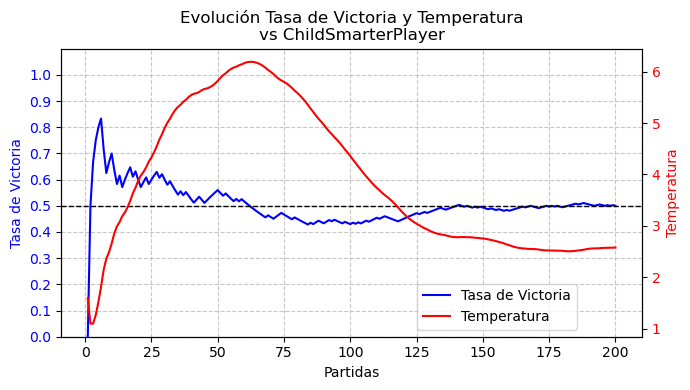

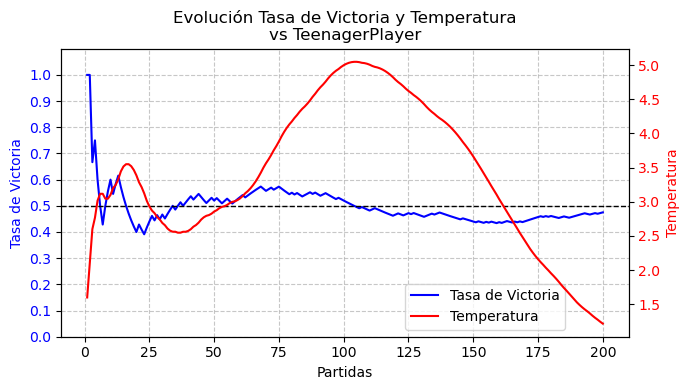

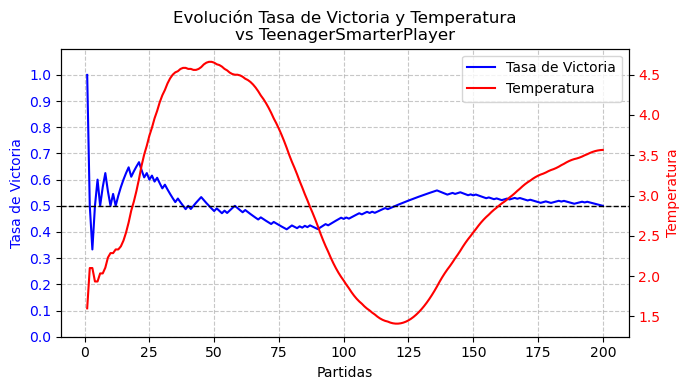

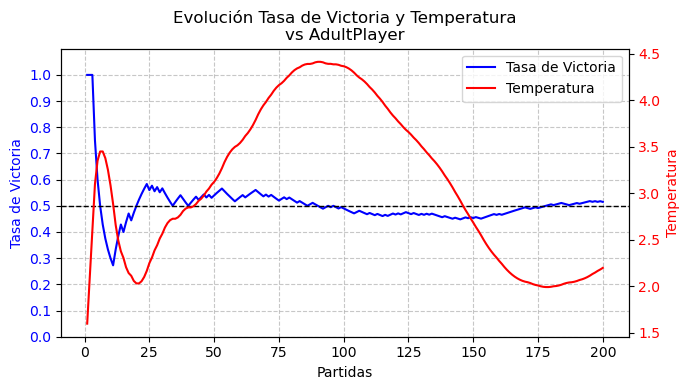

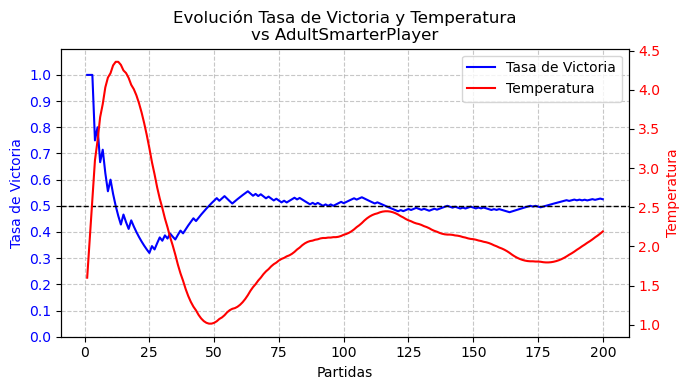

In [63]:
for idx, opponent in enumerate(df['opponent_name'].unique()):
    # Crear figura y primer eje Y
    fig, ax1 = plt.subplots(figsize=(7, 4))

    ax1.set_xlabel("Partidas")
    ax1.set_ylabel("Tasa de Victoria", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.set_ylim(0, 1.1)
    ax1.set_yticks(np.arange(0, 1.1, 0.1))
    ax1.grid(True, which='major', axis='both', linestyle='--', alpha=0.7)
    line1, = ax1.plot(list(range(1, num_games+1)), df[df['opponent_name']==opponent]['win_rate'], label="Tasa de Victoria", color="blue")

    # Segundo eje Y (temperatura)
    ax2 = ax1.twinx()
    ax2.set_ylabel("Temperatura", color="red")
    ax1.axhline(y=0.5, color='black', linestyle='--', linewidth=1, label='Target 50%')
    line2, = ax2.plot(list(range(1, num_games+1)), df[df['opponent_name']==opponent]['temperature_dda'], label="Temperatura", color="red")
    ax2.tick_params(axis="y", labelcolor="red")
    #ax2.set_ylim(0, 1.2)

    # Título y grilla
    plt.title(f"Evolución Tasa de Victoria y Temperatura\nvs {opponent}")

    # Combinar las leyendas de ambos ejes
    lines = [line1, line2]
    labels = [line.get_label() for line in lines]
    if idx > 2:
        ax1.legend(lines, labels, loc="upper right")
    else:
        ax1.legend(lines, labels, loc="lower right", bbox_to_anchor=(0.9, 0))

    fig.tight_layout()

    # Mostrar gráfico
    plt.show()

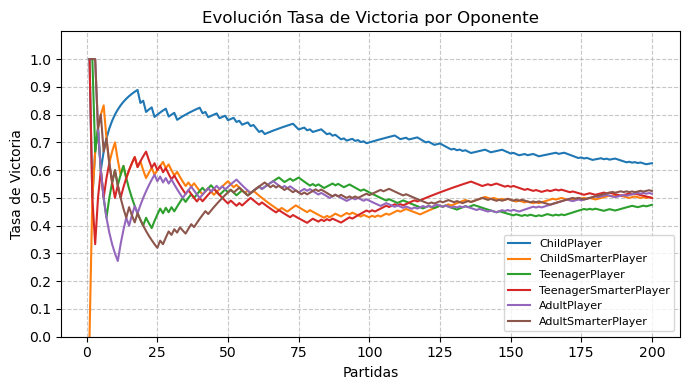

In [64]:
fig = plt.subplots(figsize=(7, 4))

for opponent in df['opponent_name'].unique():
    plt.plot(list(range(1, num_games+1)), df[df['opponent_name']==opponent]['win_rate'], label=opponent)

plt.title("Evolución Tasa de Victoria por Oponente")
plt.xlabel("Partidas")
plt.ylabel("Tasa de Victoria")
plt.ylim(0, 1.1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=8, loc="lower right")
plt.tight_layout()
plt.show()

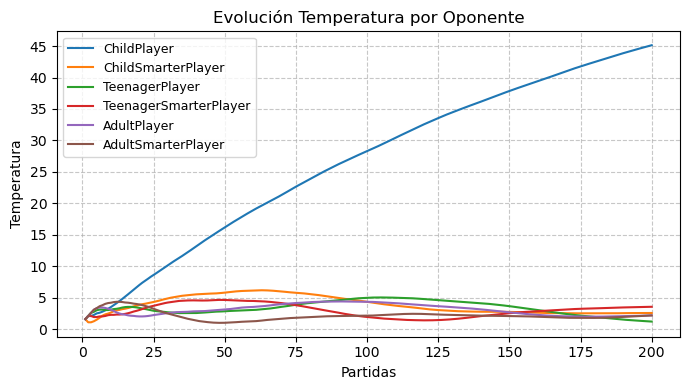

In [65]:
fig = plt.subplots(figsize=(7, 4))

for opponent in df['opponent_name'].unique():
    plt.plot(list(range(1, num_games+1)), df[df['opponent_name']==opponent]['temperature_dda'], label=opponent)

plt.title("Evolución Temperatura por Oponente")
plt.xlabel("Partidas")
plt.ylabel("Temperatura")
plt.gca().yaxis.set_major_locator(MultipleLocator(5))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=9, loc="upper left")
plt.tight_layout()
plt.show()

# Número mínimo de partidas para DDA

In [66]:
df_dda = pd.DataFrame({
    'opponent_name': df['opponent_name'].unique()
})

ranges = {
    '40% - 60%':(0.4, 0.6),
    '30% - 70%':(0.3, 0.7)
    }

for key, value in ranges.items():
    min_rate, max_rate = value
    min_plays = []

    for opponent in df['opponent_name'].unique():
        df_aux = df[df['opponent_name']==opponent]

        # Extrae la columna win_rate como array
        win_rates = df_aux['win_rate'].values

        # Busca el primer índice donde todas las win_rate siguientes están dentro del rango
        for i in range(len(win_rates)):
            if np.all((win_rates[i:] >= min_rate) & (win_rates[i:] <= max_rate)):
                min_plays.append(i+1)
                break
        else:
            min_plays.append(num_games)  # Si no se encuentra, se añade el número total de partidas
    
    df_dda[key] = min_plays

df_dda


,opponent_name,40% - 60%,30% - 70%
0,ChildPlayer,200,122
1,ChildSmarterPlayer,31,11
2,TeenagerPlayer,24,5
3,TeenagerSmarterPlayer,29,2
4,AdultPlayer,14,12
5,AdultSmarterPlayer,39,8


In [67]:
df_dda.describe()

,40% - 60%,30% - 70%
count,6.000000,6.000000
mean,56.166667,26.666667
std,70.946224,46.851539
min,14.000000,2.000000
25%,25.250000,5.750000
50%,30.000000,9.500000
75%,37.000000,11.750000
max,200.000000,122.000000


In [68]:
df_dda[df_dda['opponent_name']!='ChildPlayer'].describe()

,40% - 60%,30% - 70%
count,5.0000,5.000000
mean,27.4000,7.600000
std,9.2358,4.159327
min,14.0000,2.000000
25%,24.0000,5.000000
50%,29.0000,8.000000
75%,31.0000,11.000000
max,39.0000,12.000000


# Movimientos por partida

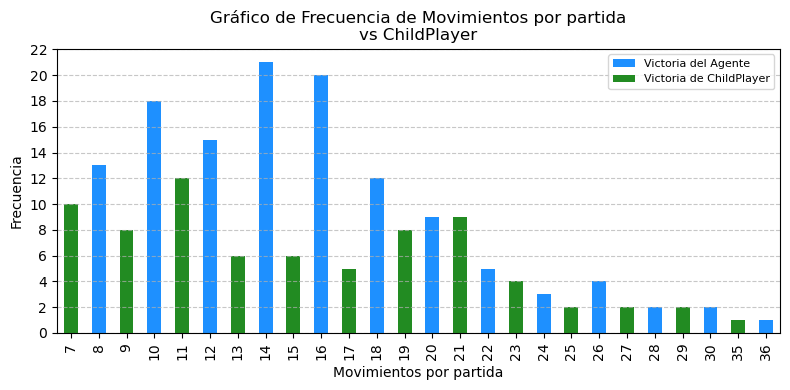

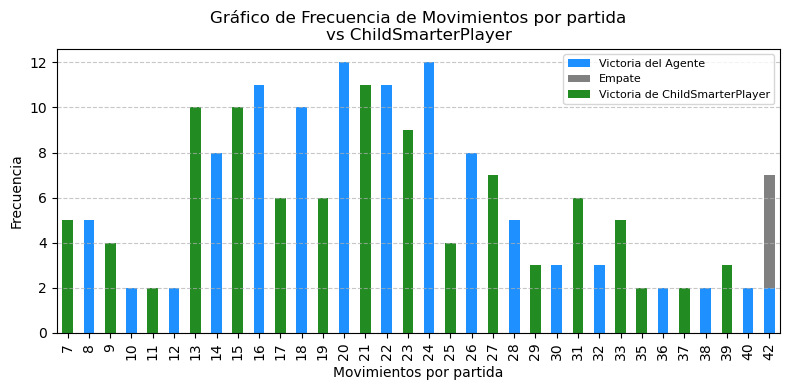

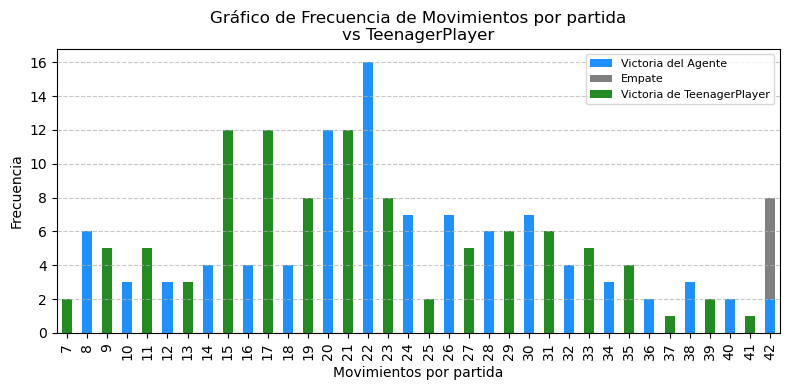

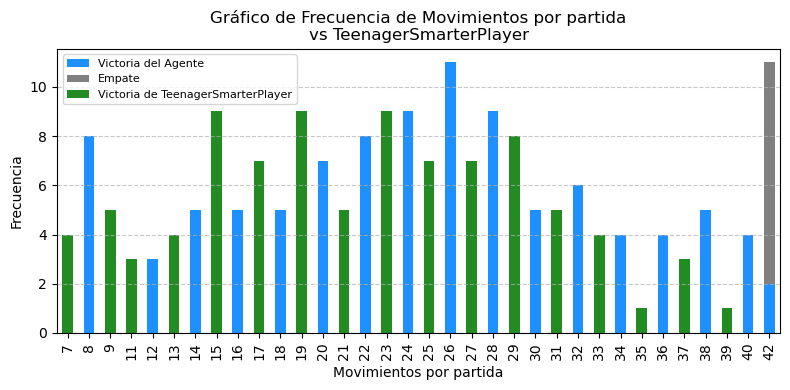

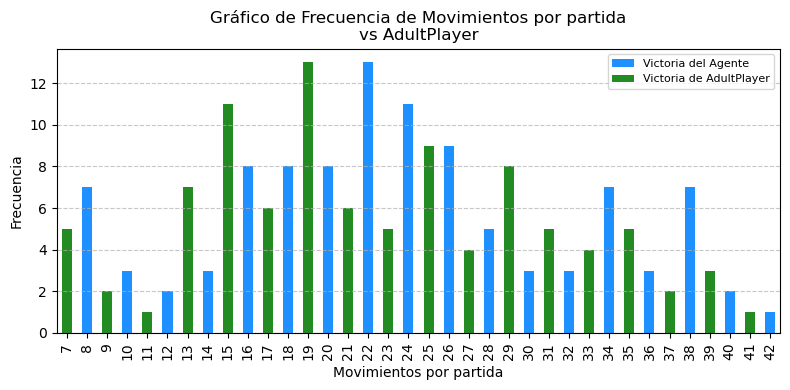

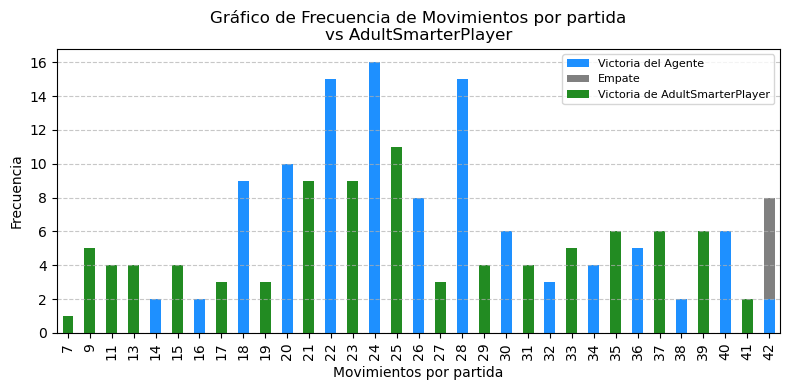

In [78]:
for opponent in df['opponent_name'].unique():
    # Gráfico apilado
    df_aux = df[df['opponent_name']==opponent].groupby(["moves_per_game", "winner"]).size().unstack(fill_value=0)

    if df_aux.shape[1] == 3:
        df_aux.plot(kind="bar", stacked=True, figsize=(8, 4), color=["dodgerblue", "grey", "forestgreen"])
        if opponent == "TeenagerSmarterPlayer":
            plt.legend(labels=["Victoria del Agente", "Empate", f"Victoria de {opponent}"], loc="upper left", fontsize=8)
        else:
            plt.legend(labels=["Victoria del Agente", "Empate", f"Victoria de {opponent}"], loc="upper right", fontsize=8)
    elif df_aux.shape[1] == 2:
        df_aux.plot(kind="bar", stacked=True, figsize=(8, 4), color=["dodgerblue", "forestgreen"])
        plt.legend(labels=["Victoria del Agente", f"Victoria de {opponent}"], loc="upper right", fontsize=8)

    plt.title(f"Gráfico de Frecuencia de Movimientos por partida\nvs {opponent}")
    plt.xlabel("Movimientos por partida")
    plt.ylabel("Frecuencia")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.gca().yaxis.set_major_locator(MultipleLocator(2))
    plt.tight_layout()
    plt.show()

C:\Users\alber\AppData\Local\Temp\ipykernel_130368\2104860788.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[(df['opponent_name']==opponent) & (df['winner']!='draw')],
C:\Users\alber\AppData\Local\Temp\ipykernel_130368\2104860788.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[(df['opponent_name']==opponent) & (df['winner']!='draw')],
C:\Users\alber\AppData\Local\Temp\ipykernel_130368\2104860788.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[(df['opponent_name']==opponent) & (df['winner']!='draw')],
C:\U

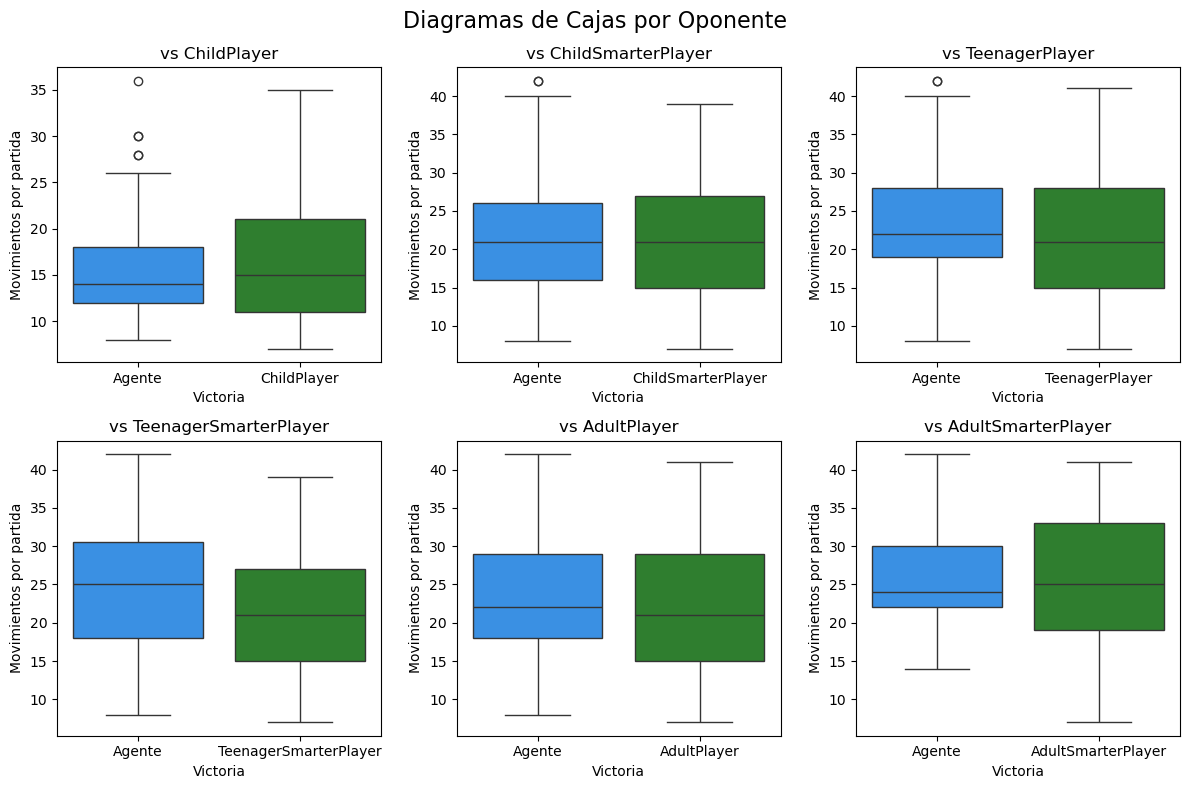

In [70]:
# Crear figura y ejes (2 filas x 3 columnas)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()  # Para iterar fácilmente

for i, opponent in enumerate(df['opponent_name'].unique()):
    ax = axes[i]

    # Crear boxplot
    sns.boxplot(data=df[(df['opponent_name']==opponent) & (df['winner']!='draw')],
                y='moves_per_game',
                x='winner',
                palette=['dodgerblue', 'forestgreen'],
                order=['agent', 'opponent'],
                ax=ax)
    
    # Cambiar etiquetas del eje X
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Agente', opponent])

    ax.set_title(f"vs {opponent}")
    ax.set_xlabel("Victoria")
    ax.set_ylabel("Movimientos por partida")

# Ajustar diseño
fig.suptitle("Diagramas de Cajas por Oponente", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Mediana de movimientos por partida para victoria
df.groupby(['opponent_name', 'winner'])['moves_per_game'].median().unstack()[['agent', 'opponent']].reindex([
    'ChildPlayer',
    'ChildSmarterPlayer',
    'TeenagerPlayer',
    'TeenagerSmarterPlayer',
    'AdultPlayer',
    'AdultSmarterPlayer'
])

winner,agent,opponent
opponent_name,,
ChildPlayer,14.0,15.0
ChildSmarterPlayer,21.0,21.0
TeenagerPlayer,22.0,21.0
TeenagerSmarterPlayer,25.0,21.0
AdultPlayer,22.0,21.0
AdultSmarterPlayer,24.0,25.0


## Partidas consideradas como que el agente se ha dejado ganar

In [72]:
# Partidas ganadas por oponentes consideradas como que "el agente se ha dejado ganar"
# Se toma como criterio que le # de movimientos sea menor o igual a 9 (partida finalizada antes del primer cuarto de juego (9 de 42 movimientos posibles))
s = df[(df['winner']=='opponent') &
       (df['moves_per_game']<=9)].groupby('opponent_name')['moves_per_game'].size().reindex(['ChildPlayer',
                                                                                             'ChildSmarterPlayer',
                                                                                             'TeenagerPlayer',
                                                                                             'TeenagerSmarterPlayer',
                                                                                             'AdultPlayer',
                                                                                             'AdultSmarterPlayer'])
s

opponent_name
ChildPlayer              18
ChildSmarterPlayer        9
TeenagerPlayer            7
TeenagerSmarterPlayer     9
AdultPlayer               7
AdultSmarterPlayer        6
Name: moves_per_game, dtype: int64

In [73]:
# Porcentaje de partidas ganadas por oponentes consideradas como que "el agente se ha dejado ganar"
s / num_games

opponent_name
ChildPlayer              0.090
ChildSmarterPlayer       0.045
TeenagerPlayer           0.035
TeenagerSmarterPlayer    0.045
AdultPlayer              0.035
AdultSmarterPlayer       0.030
Name: moves_per_game, dtype: float64

# % Victorias

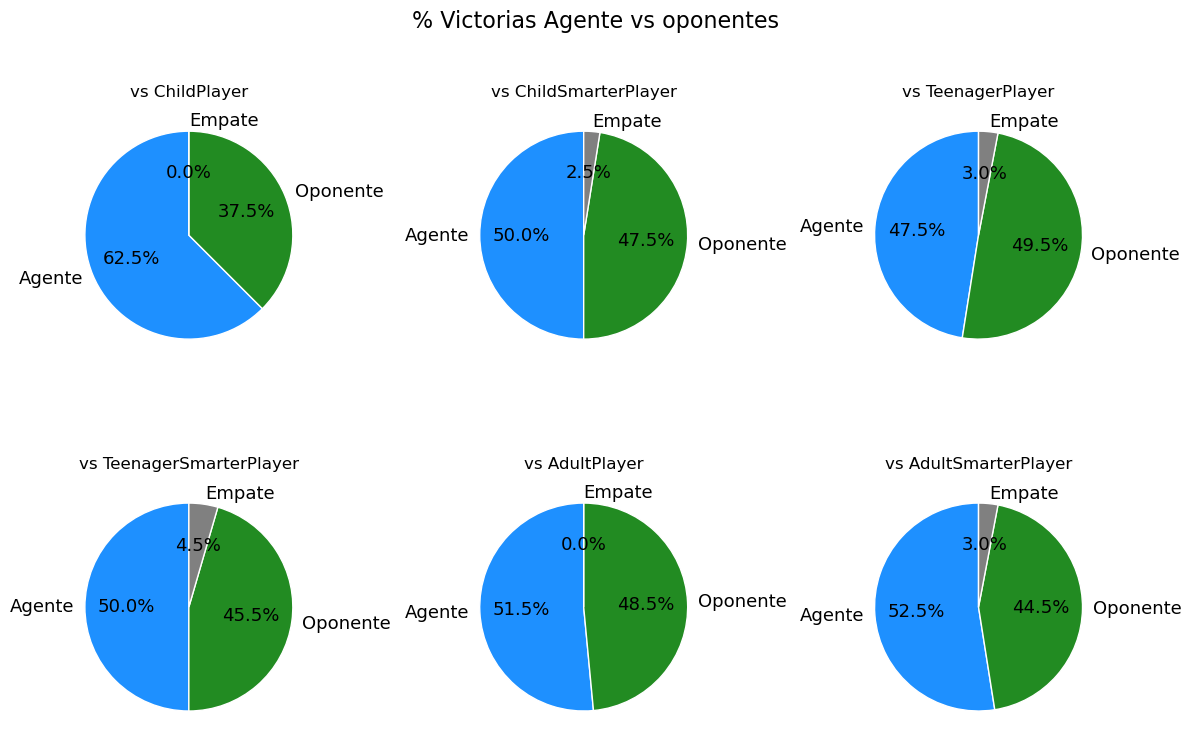

In [7]:
# Crear figura con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("% Victorias Agente vs oponentes", fontsize=16)

# Aplanar ejes para iterar fácilmente
axes = axes.flatten()

for i, opponent in enumerate(df['opponent_name'].unique()):
    df_aux = df[df['opponent_name']==opponent]['winner'].value_counts(normalize=True).reindex(['agent', 'opponent', 'draw']).replace(np.nan, 0)

    if df_aux.shape[0] == 3:
        axes[i].pie(df_aux,
                    labels=['Agente', 'Oponente', 'Empate'],
                    colors=['dodgerblue', 'forestgreen', 'grey'],
                    autopct='%1.1f%%',
                    startangle=90,
                    wedgeprops=dict(edgecolor='white'),
                    textprops={'fontsize': 13}
                    )
    elif df_aux.shape[0] == 2:
        axes[i].pie(df_aux,
                    labels=['Agente', 'Oponente'],
                    colors=['dodgerblue', 'forestgreen'],
                    autopct='%1.1f%%',
                    startangle=90,
                    wedgeprops=dict(edgecolor='white'),
                    textprops={'fontsize': 13}
                    )
    
    axes[i].set_title(f"vs {opponent}")

# Ajustar diseño
plt.tight_layout()
plt.show()

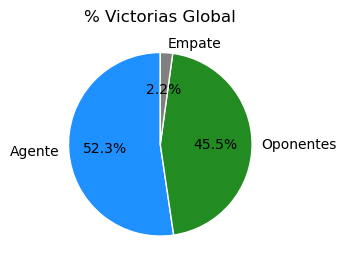

In [75]:
fig, axes = plt.subplots(figsize=(3.5, 3.5))

plt.pie(df['winner'].value_counts(normalize=True).reindex(['agent', 'opponent', 'draw']).replace(np.nan, 0),
        labels=['Agente', 'Oponentes', 'Empate'],
        colors=['dodgerblue', 'forestgreen', 'grey'],
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(edgecolor='white')
        )

plt.title("% Victorias Global")

# Ajustar diseño
plt.tight_layout()
plt.show()